In [1]:
# Imports
import copy
from IPython import display
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pylab as pl
from pathlib import Path
from scipy import special

import torch
import torch.nn as nn

Data loading and prepping code

In [2]:
data_directory = "./data"
train_csv = os.path.join(data_directory, "train.csv")
test_csv = os.path.join(data_directory, "test.csv")

In [3]:
train_df = pd.read_csv(train_csv) 
train_df.head(5)

,X000,X001,X002,X003,X004,X005,X006,X007,X008,X009,...,X384,X385,X386,X387,X388,X389,X390,X391,X392,Y
0,0.435294,0.568627,0.470588,0.239216,0.062745,0.003922,0.000000,0.000000,0.133333,0.321569,...,0.694118,0.000000,0.000000,0.000000,0.000000,0.000000,0.054902,0.243137,0.537255,5
1,0.290196,0.192157,0.098039,0.039216,0.011765,0.000000,0.000000,0.000000,0.482353,0.627451,...,0.278431,0.007843,0.019608,0.035294,0.054902,0.082353,0.133333,0.141176,0.098039,0
2,0.000000,0.000000,0.000000,0.000000,0.003922,0.027451,0.082353,0.184314,0.000000,0.000000,...,0.380392,0.007843,0.050980,0.164706,0.301961,0.400000,0.443137,0.415686,0.360784,4
3,0.745098,0.952941,0.870588,0.329412,0.035294,0.000000,0.000000,0.000000,0.000000,0.058824,...,0.000000,0.015686,0.211765,0.341176,0.800000,0.101961,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9


In [4]:
test_df = pd.read_csv(test_csv)
test_df.head()

,X000,X001,X002,X003,X004,X005,X006,X007,X008,X009,...,X384,X385,X386,X387,X388,X389,X390,X391,X392,Y
0,0.011765,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.964706,0.925490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
1,0.000000,0.000000,0.000000,0.152941,0.988235,0.843137,0.125490,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7
2,0.058824,0.141176,0.254902,0.360784,0.427451,0.466667,0.474510,0.439216,0.015686,0.062745,...,0.000000,0.058824,0.086275,0.105882,0.113725,0.105882,0.082353,0.054902,0.023529,3
3,0.011765,0.054902,0.121569,0.188235,0.219608,0.196078,0.129412,0.066667,0.000000,0.000000,...,0.007843,0.000000,0.000000,0.011765,0.031373,0.066667,0.090196,0.082353,0.054902,9
4,0.027451,0.035294,0.035294,0.027451,0.011765,0.000000,0.000000,0.000000,0.074510,0.121569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6


In [5]:
train_df.describe()

,X000,X001,X002,X003,X004,X005,X006,X007,X008,X009,...,X384,X385,X386,X387,X388,X389,X390,X391,X392,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.072656,0.088541,0.097540,0.102151,0.100832,0.094339,0.083786,0.068533,0.079016,0.106344,...,0.072595,0.048585,0.062882,0.074414,0.082458,0.084926,0.082384,0.075272,0.063030,4.447100
std,0.165843,0.185382,0.195447,0.200232,0.199312,0.193450,0.183295,0.164838,0.174596,0.204404,...,0.170526,0.138202,0.159689,0.175288,0.185286,0.186632,0.181921,0.171831,0.155235,2.890827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.047059,0.074510,0.090196,0.101961,0.098039,0.078431,0.054902,0.027451,0.054902,0.109804,...,0.035294,0.003922,0.015686,0.035294,0.047059,0.054902,0.054902,0.043137,0.027451,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [6]:
# Setup train data
train_data_set = train_df.to_numpy()
train_mean = np.mean(train_data_set[:, :-1], axis=0, keepdims=True)
train_std = np.std(train_data_set[:, :-1], axis=0, keepdims=True)
train_data_set[:, :-1] = (train_data_set[:, :-1] - train_mean) / train_std
classes = np.unique(train_data_set[:, -1])

# Sample equal number of samples per class
number_of_validation_samples_per_class = math.ceil(train_data_set.shape[0] * 0.20 / len(classes))
train_x, train_y = [], []
valid_x, valid_y = [], []
for i in classes:
    class_related_indices = np.array(range(train_data_set.shape[0]))[train_data_set[:, -1] == i]
    np.random.shuffle(class_related_indices)
    train_x.extend(train_data_set[number_of_validation_samples_per_class:, :-1])
    valid_x.extend(train_data_set[:number_of_validation_samples_per_class, :-1])
    train_y.extend(train_data_set[number_of_validation_samples_per_class:, -1:])
    valid_y.extend(train_data_set[:number_of_validation_samples_per_class, -1:])
    
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
valid_x = np.asarray(valid_x)
valid_y = np.asarray(valid_y)

print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)

(294000, 393) (294000, 1) (6000, 393) (6000, 1)


Model Creation

In [7]:
# Config parameter
class configNN():
    def __init__(self, input_channels, output_channels, layer_list, loss, activation=nn.ReLU, dropout=1.0, optimizer=torch.optim.SGD, learning_rate=0.1, initialiser=torch.nn.init.kaiming_normal_):
        """
            input_channels: (int) number of input channels
            output_channels: (int) number of output channels
            layer_list: (list) a list containing integers indicating the amount of nodes in each mlp layer
            loss: (nn.Criterion) a pytorch criterion class to use
            activation: (nn.Module) a pytorch activation class to use
            dropout: (float) indicating the use of dropout, 1.0 indicates no dropout, less than 1.0 indicates dropout
            optimizer: (nn.Optimizer) which optimizer to use
            learning_rate: (float) learrning rate of the model
            initialiser: (nn.init) a torch initialiser to use
        """
        assert input_channels > 0, "Input channels need to be larger than 0"
        self.input_channels = input_channels
        assert input_channels > 0, "Output channels need to be larger than 0"
        self.output_channels = output_channels
        self.layer_list = layer_list
        self.activation = activation
        self.dropout = dropout
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.initialiser = initialiser
        self.loss = loss

In [8]:
# Model Class
class Ensemble():
    """
    Ensemble class
    """
    
    def __init__(self, list_of_configs, device="cuda:0"):
        """
        list_of_configs: (list) a list containing configNN objects
        """
        # Initialise variables
        self.list_of_configs = list_of_configs
        self.models = []
        self.optimizers = []
        self.loss_criterions = []
        self.device = device
    
        # Build models
        for config in self.list_of_configs:
            self._build_and_initialise_model(config)
            
        # Set to device
        self._to_device()
        
        # Compact variable
        self.packages = list(zip(self.models, self.optimizers, self.loss_criterions))
           
            
    def _build_and_initialise_model(self, config):
        """
        Build all the models
        config: (configNN) config object that contains all the necesarry data
        """
        # Add MLP layers
        layer_list = []
        if len(config.layer_list) ==0:
            layer_list.append(torch.nn.linear(config.input_channels, config.output_channels, bias=True))
        else:
            layer_list_nodes = [config.input_channels] + config.layer_list + [config.output_channels]
            for layer_nodes_index in range(len(layer_list_nodes[:-1])):
                layer_list.append(torch.nn.Linear(layer_list_nodes[layer_nodes_index], layer_list_nodes[layer_nodes_index+1], bias=True))
                if layer_nodes_index < len(layer_list_nodes) - 2:
                    layer_list.append(config.activation())
            
        # Add dropout
        if config.dropout < 1.0:
            layer_list.append(torch.nn.Dropout(config.dropout))
            
        # Create model
        model = torch.nn.Sequential(*layer_list)
        
        # Initialise model
        for layer in model:
            if isinstance(layer, nn.Linear):
                config.initialiser(layer.weight)
                if layer.bias is not None:
                    layer.bias.data.fill_(0.01)
                              
        # Create optimizer
        optimizer = config.optimizer(model.parameters(), config.learning_rate)
                              
        # Create Loss criterion
        loss_criterion = config.loss
                              
        # Store
        self.models.append(model)
        self.optimizers.append(optimizer)
        self.loss_criterions.append(loss_criterion)
        
    def _to_device(self):
        """
        Set models to a specific device
        device: (str) representing the device for the models
        """
        for model in self.models:
            model.to(self.device)
            
    def batch_predict(self, input_batch):
        """
        Batch predict for this ensemble class
        input_batch: (toch.FloatTensor) MxN with N equalling the input channels of the features.
        """
        total_output = None
        for model in self.models:
            model.eval()
            output = special.softmax(model(input_batch).detach().cpu().numpy(), axis=1)
            if total_output is None:
                total_output = output
            else:
                total_output += output
        return total_output
        

In [9]:
# Create models
model_list = [
    configNN(train_x.shape[1], len(classes), [256, 128, 64], torch.nn.CrossEntropyLoss(), optimizer=torch.optim.Adam, learning_rate=0.0001, dropout=0.3),
    configNN(train_x.shape[1], len(classes), [256, 128, 128], torch.nn.CrossEntropyLoss(), optimizer=torch.optim.SGD, learning_rate=0.0001, dropout=0.4),
    configNN(train_x.shape[1], len(classes), [512, 64, 64], torch.nn.CrossEntropyLoss(), optimizer=torch.optim.Adam, learning_rate=0.0001, dropout=0.3),
    configNN(train_x.shape[1], len(classes), [64, 64], torch.nn.CrossEntropyLoss(), optimizer=torch.optim.SGD, learning_rate=0.0001, dropout=1.0),
    configNN(train_x.shape[1], len(classes), [256, 256], torch.nn.CrossEntropyLoss(), optimizer=torch.optim.Adam, learning_rate=0.0001, dropout=0.1)
]

ensemble = Ensemble(model_list)

Training

- Disclaimer 1: code below can be done with early stopping, however I moved away from early stopping to avoid the double descent problem.
- Disclaimer 2: I would also add a LR_scheduler and I would reduce the amount of duplicated code.

In [10]:
max_epochs = 100
batch_size = 8192
device = "cuda:0"

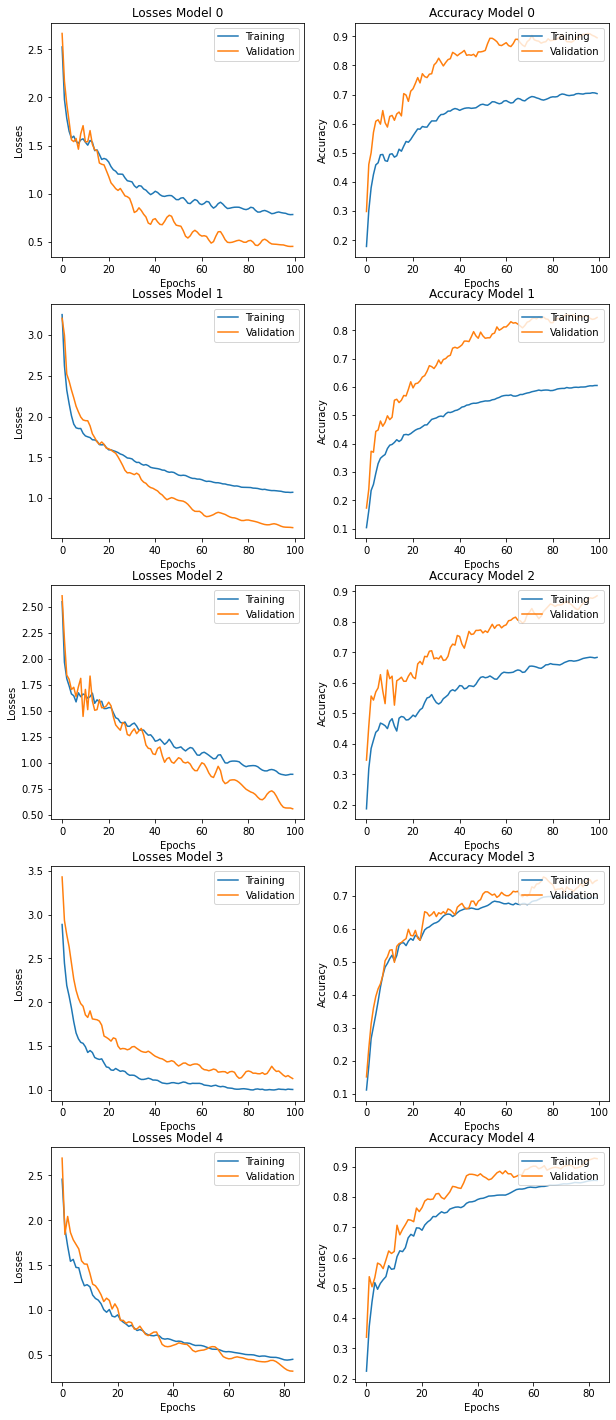

In [ ]:
# Prepare plots
fig, ax = plt.subplots(nrows=len(model_list), ncols=2)
fig.set_size_inches(2 * 5, len(model_list) * 5)

# Loop over all models
for model_index, (model, optimizer, loss_criterion) in enumerate(ensemble.packages):   
    # Keep best model variables
    best_validation_score = None
    best_validation_model = None
    
    # Save results variables
    train_losses = []
    train_accuracies = []
    validation_losses = []
    validation_accuracies = []
    
    # Loop over epochs
    for epoch in range(max_epochs):
        current_training_loss = 0
        training_results = []
        current_validation_loss = 0
        validation_results = []
        
        # Ahuffle data at start of each epoch
        permutation = np.random.permutation(len(train_x))
        train_x = train_x[permutation]
        train_y = train_y[permutation]
        
        # Training
        model.train()
        for i in range(0, train_x.shape[0], batch_size):
            # Get batch, predict, calculate loss
            batch = torch.FloatTensor(train_x[i:i+batch_size]).to(device)
            targets = torch.LongTensor(train_y[i:i+batch_size]).to(device)
            output = model(batch)
            loss = loss_criterion(output, targets.view(-1))
            
            # Back propagate
            loss.backward()
            optimizer.step()
            
            # Update epoch loss
            current_training_loss += loss * batch_size
            training_results.extend(output.detach().cpu().tolist())
            
        # Total loss
        current_training_loss /= train_x.shape[0]
        # Accuracy
        training_results = np.reshape(np.argmax(np.asarray(training_results), axis=1), (-1, 1))
        training_accuracy = np.sum(training_results == train_y) / len(training_results)
        # Add to lists
        train_losses.append(current_training_loss.item())
        train_accuracies.append(training_accuracy)
            
        # Validation
        model.eval()
        for i in range(0, valid_x.shape[0], batch_size):
            # Get batch, predict, calculate loss
            batch = torch.FloatTensor(valid_x[i:i+batch_size]).to(device)
            targets = torch.LongTensor(valid_y[i:i+batch_size]).to(device)
            output = model(batch)
            loss = loss_criterion(output, targets.view(-1))
            
            # Back propagate
            loss.backward()
            optimizer.step()
            
            # Update epoch loss
            current_validation_loss += loss * batch_size
            validation_results.extend(output.detach().cpu().tolist())
            
        # Total loss
        current_validation_loss /= valid_x.shape[0]
        # Accuracy
        validation_results = np.reshape(np.argmax(np.asarray(validation_results), axis=1), (-1, 1))
        validation_accuracy = np.sum(validation_results == valid_y) / len(validation_results)
        # Add to lists
        validation_losses.append(current_validation_loss.item())
        validation_accuracies.append(validation_accuracy)
        
        # Save best model
        if best_validation_score is None or current_validation_loss<best_validation_score:
            best_validation_score = current_validation_loss
            best_validation_model=copy.deepcopy(model.state_dict())
        
        # Update Plot
        ax[model_index, 0].cla()
        train_line, = ax[model_index, 0].plot(range(len(train_losses)), train_losses)
        train_line.set_label("Training")
        valid_line, = ax[model_index, 0].plot(range(len(validation_losses)), validation_losses)
        valid_line.set_label("Validation")
        ax[model_index, 0].set_title("Losses Model %d" % model_index)
        ax[model_index, 0].set_xlabel("Epochs")
        ax[model_index, 0].set_ylabel("Losses")
        ax[model_index, 0].legend(loc="upper right")
        
        ax[model_index, 1].cla()
        train_line, = ax[model_index, 1].plot(range(len(train_accuracies)), train_accuracies)
        train_line.set_label("Training")
        valid_line, = ax[model_index, 1].plot(range(len(validation_accuracies)), validation_accuracies)
        valid_line.set_label("Validation")
        ax[model_index, 1].set_title("Accuracy Model %d" % model_index)
        ax[model_index, 1].set_xlabel("Epochs")
        ax[model_index, 1].set_ylabel("Accuracy")
        ax[model_index, 1].legend(loc="upper right")
        
        display.display(fig)
        display.clear_output(wait = True)
    
    # Set model to weights with best validation score
    model.load_state_dict(best_validation_model)

Validation and Test scores

In [ ]:
# Setup test data
test_data_set = test_df.to_numpy()
test_data_set[:, :-1] = (test_data_set[:, :-1] - train_mean) / train_std
test_x = test_data_set[:, :-1]
test_y = test_data_set[:, -1:]

In [ ]:
# Validation
validation_results = []
for i in range(0, valid_x.shape[0], batch_size):
    # Get batch
    batch = torch.FloatTensor(valid_x[i:i+batch_size]).to(device)
    targets = torch.LongTensor(valid_y[i:i+batch_size]).to(device)
    output = ensemble.batch_predict(batch)

    validation_results.extend(output)

# Accuracy
validation_results = np.reshape(np.argmax(np.asarray(validation_results), axis=1), (-1, 1))
validation_accuracy = np.sum(validation_results == valid_y) / len(validation_results)

# Validation
test_results = []
for i in range(0, test_x.shape[0], batch_size):
    # Get batch
    batch = torch.FloatTensor(test_x[i:i+batch_size]).to(device)
    targets = torch.LongTensor(test_y[i:i+batch_size]).to(device)
    output = ensemble.batch_predict(batch)

    test_results.extend(output)

# Accuracy
test_results = np.reshape(np.argmax(np.asarray(test_results), axis=1), (-1, 1))
test_accuracy = np.sum(test_results == test_y) / len(test_results)

print("Validation accuracy %0.3f - Test accuracy %0.3f" % (validation_accuracy, test_accuracy))